# <font color="purple"><h3 align="center">Pandas Merge Tutorial</h3></font>

## <font color='blue'>Basic Merge Using a Dataframe Column</font>

In [4]:
import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [5]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [6]:
df3 = pd.merge(df1, df2, on="city") # similar to join
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


## <font color='blue'>Type Of DataBase Joins</font>

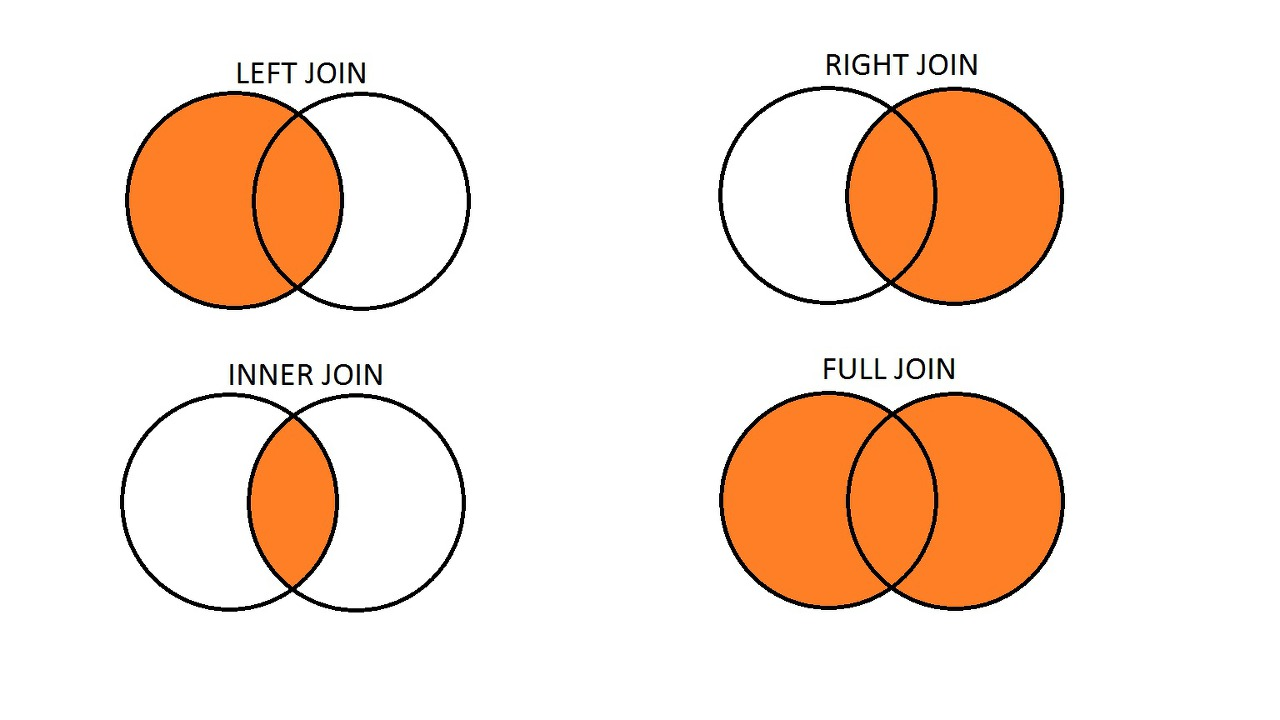

In [7]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [8]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


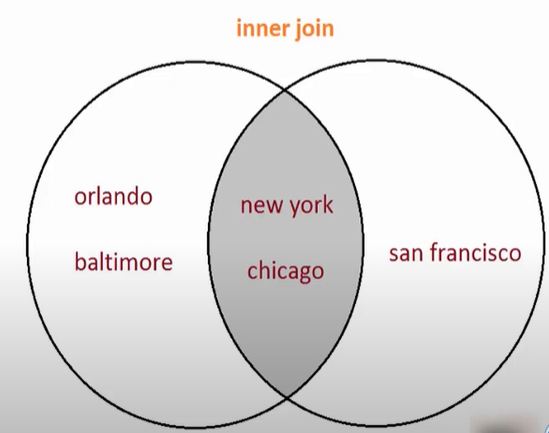

In [9]:
df3=pd.merge(df1,df2,on="city",how="inner")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


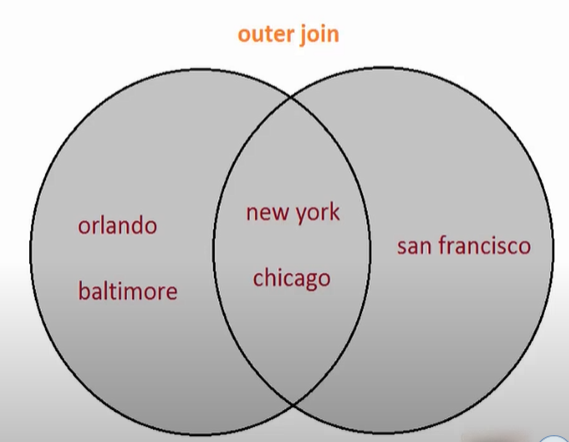

In [10]:
df3=pd.merge(df1,df2,on="city",how="outer")
df3

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


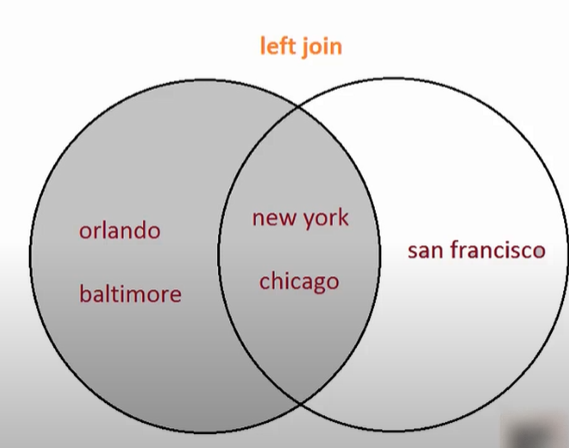

In [11]:
df3=pd.merge(df1,df2,on="city",how="left")
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [12]:
df3=pd.merge(df1,df2,on="city",how="right")
df3

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,san diego,NaN,71


## <font color='blue'>indicator flag</font>

In [13]:
df3=pd.merge(df1,df2,on="city",how="outer",indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


## <font color='blue'>suffixes</font>

when we have same column names in both tables... 

from table_1 --- temperature,humidity we have

from table_2 --- also we have temperature and humidity

In [20]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [21]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [24]:
new_df= pd.merge(df1,df2,on="city") # automatically adding the suffixes
new_df

,city,temperature_x,humidity_x,temperature_y,humidity_y
0,new york,21,65,14,68
1,chicago,14,68,21,65


In [16]:
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))  # when we take outer join it means we wont have some values to the columns which are not present in both tables
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


## <font color='blue'>join</font>

In [27]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1.set_index('city',inplace=True)
df1

,temperature
city,
new york,21
chicago,14
orlando,35


In [26]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2.set_index('city',inplace=True)
df2

,humidity
city,
chicago,65
new york,68
orlando,75


In [25]:
df1.join(df2,lsuffix='_l', rsuffix='_r')

,city_l,temperature_l,humidity_l,city_r,temperature_r,humidity_r
0,new york,21,65,chicago,21.0,65.0
1,chicago,14,68,new york,14.0,68.0
2,orlando,35,71,san diego,35.0,71.0
3,baltimore,38,75,NaN,NaN,NaN
